<a href="https://colab.research.google.com/github/juhumkwon/source_code/blob/main/4_1%EA%B0%95_KNN%EC%98%88%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

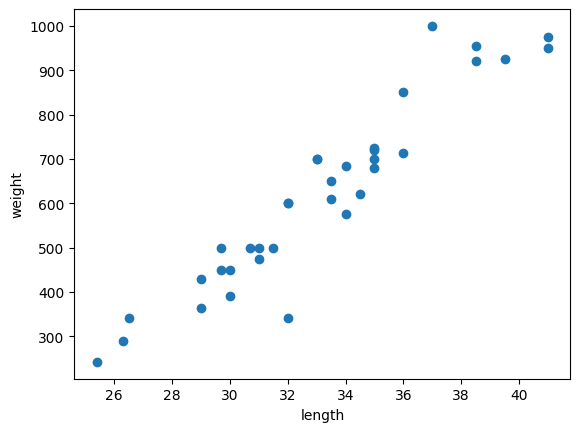

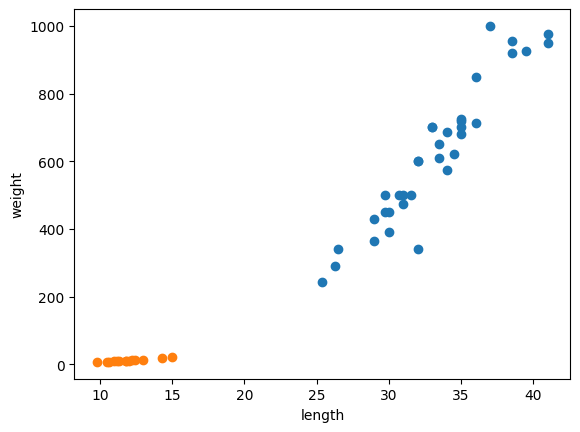

fish data score =  1.0
fish data =  1.0
test_score= 1.0
[1 1 0 1 1 1 1 0 1 0 1 1 1 1]
[1 1 0 1 1 1 1 0 1 0 1 1 1 1]
예측하라 25, 150= [0]


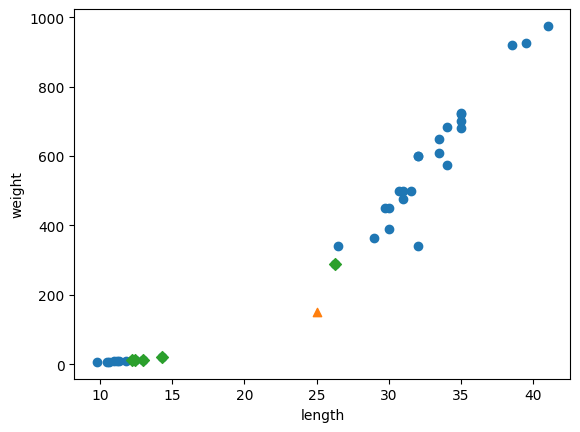

[[130.73859415 137.17988191 138.32150953 138.39320793 140.00603558]]


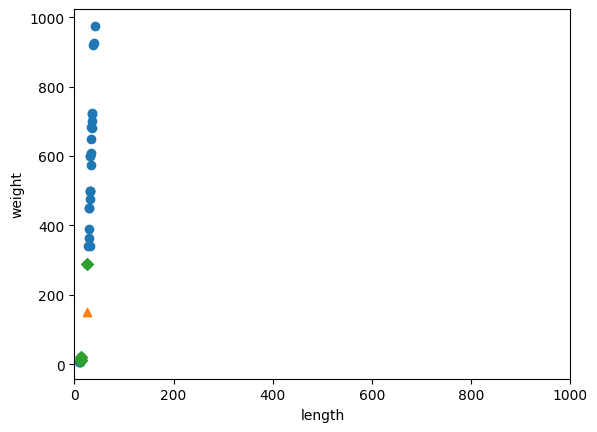

[ 26.10857143 402.28285714] [ 10.24816001 306.15579086]


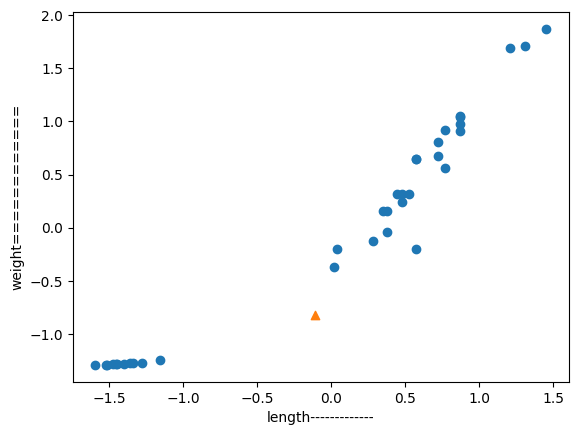

New= [1]


In [19]:
#출처: https://rebro.kr/183 [Rebro의 코딩 일기장:티스토리]
#도미 길이, 무게
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

#from K_NN_data import *
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(bream_length, bream_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

#빙어 길이, 무게
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

#from K_NN_data import *
import matplotlib.pyplot as plt

plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

length = bream_length + smelt_length
weight = bream_weight + smelt_weight


fish_data = [[l, w] for l, w in zip(length, weight)]
fish_target = [1] * 35 + [0] * 14
#print('fish_target=', fish_target)

from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

kn.fit(fish_data, fish_target)
print("fish data score = ", kn.score(fish_data, fish_target)) # 1.0

kn = KNeighborsClassifier(n_neighbors=5)
kn.fit(fish_data, fish_target)
print("fish data = ", kn.score(fish_data, fish_target)) # 0.714285714285714

#=========================데이터 셔플============================================

input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

#넘파이에서 무작위 결과를 만드는 함수들은 실행할 때마다 다른 결과를 만든다. 일정한 결과를 얻기 위해서는 위처럼 랜덤 시드(Random seed)를 설정해주면 된다.
np.random.seed(48)
index = np.arange(49) # [0, 1, 2, ... , 48]
np.random.shuffle(index)

train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]
test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

kn.fit(train_input, train_target)
print("test_score=", kn.score(test_input, test_target)) # 1.0

print(kn.predict(test_input)) # [0 0 1 0 1 1 1 0 1 1 0 1 1 0]
print(test_target) # [0 0 1 0 1 1 1 0 1 1 0 1 1 0]

print("예측하라 25, 150=", kn.predict([[25.0, 150.0]])) # [0]

distances, indexes = kn.kneighbors([[25, 150]])

plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

print(distances) # [[ 92.00086956 130.73859415 137.17988191 138.32150953 138.39320793]]
#===================================================================

plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker='D')
plt.xlim((0, 1000))
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

#===================================================================
mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)
print(mean, std) # [ 28.29428571 483.35714286] [  9.54606704 323.47456715]
train_scaled = (train_input - mean) / std

new = ([25, 150] - mean) / std
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(new[0], new[1], marker='^')
plt.xlabel('length-------------')
plt.ylabel('weight============')
plt.show()

kn.fit(train_scaled, train_target)
test_scaled = (test_input - mean) / std
kn.score(test_scaled, test_target) # 1.0
print("New=", kn.predict([new])) # [1]
